# CREDENCE -  Credence to Causal Estimates

### Premise. 
Retrospective causal inference methods, like synthetic controls or difference in difference, are widely used to estimate the impact of an intervention where A/B testing is not an option: for example, fee changes or marketing campaigns. The causal effect of an intervention is the difference between the outcome under a treatment and the counterfactual outcome if an alternative treatment (or no treatment) was chosen. The main challenge in retrospective and non-experimental causal inference is that we only observe the outcome under one of the treatment choices while the counterfactual is never observed. Causal inference methods aims to re-create the scenario in which the alternative treatment was chosen i.e. estimating the counterfactual.

### Evaluation. 
Traditional causal inference methods are typically evaluated in two ways: placebo tests and tests on simulated data. Placebo tests check that the treatment effect estimated by a particular method is zero during a period there is actually no intervention: in that situation, the actual should match the counterfactual. Testing on simulated data is limited because the data generative process is often simple and lacks the complexities of real world datasets where the method is actually applied. For applied researchers, the important question is understanding how well a method actually performs in realistic situations, not on a toy dataset.

### Framework. 
In this project, we propose and develop a framework for generating complex and realistic datasets with known treatment effects. This approach combines the best parts of placebo tests and simulation tests: the simulated dataset would have as much complexity as the real world datasets used in placebo tests, but users would be able to control the treatment effect as well as the level of endogeneity like they do in simulation tests.

Thus, generated datasets can then be used to understand the performance of different causal inference methods on various metrics, allowing scientists to choose appropriate method for a given problem. Currently, we focus on causal inference with time-series data using synthetic control method(s). 

Our framework uses a neural network based black-box data generative model called Autoregressive Variational AutoEncoder (AR-VAE), and an interpretable transformation map (ITM) to learn the distribution and sample dataset which have similar dynamics as the real datasets of interest. The AR-VAE model allows us to generate complex data while the ITM allows us to manipulate and intervene on the samples to encode treatment effects. 

Code Commit Link - https://git-codecommit.us-east-1.amazonaws.com/v1/repos/credence

### Prerequisite python libraries
Numpy, Math, Pytorch, Pytorchvision, Pytorch-lightning, Pandas, Matplotlib, Sys, OS

In [1]:
# Add path for repo
import os
import sys
sys.path.append(os.path.abspath('../python'))

In [8]:
import numpy as np
import pandas as pd
import torch

import warnings
warnings.filterwarnings('ignore')

import train_arvae
import verify_causal_model

## How to use CREDENCE

### Fetch Training Data
Read training data and store it in form (T,B,N) where T is the number of time steps, B is the number of units, N is the number of time-series in a unit.

In [9]:
B=100
N=10

datapath = os.path.abspath('../data')
training_data = pd.read_csv(os.path.join(datapath,'gdpTrainingData.csv'), header=0, index_col=0)
# training_data.iloc[:,[1,3]]
num_rows, num_cols = training_data.shape
for i in range(0,B):
    col_idx = np.random.choice( num_cols, N)
    data_i = training_data.iloc[:,col_idx].to_numpy().reshape(training_data.shape[0],1,-1)
    if i == 0:
        data = data_i
    else:
        data = np.concatenate((data,data_i),axis=1)

print(data.shape)

(61, 100, 10)


###### Normalize Data

In [10]:
m = np.mean(data)
s = np.std(data)
data_norm = (data-m)/s

print(f"Shape: {data_norm.shape}")
print(f"\nMean of raw data: {np.mean(data):.3f}")
print(f"Std. dev of raw data: {np.std(data):.3f}")
print(f"\nMean of normalized data: {np.mean(data_norm):.3f}")
print(f"Std. dev of normalized data: {np.std(data_norm):.3f}")

Shape: (61, 100, 10)

Mean of raw data: 816500.225
Std. dev of raw data: 2168842.872

Mean of normalized data: 0.000
Std. dev of normalized data: 1.000


### Train ARVAE

##### Set Hyperparameters

In [13]:
hyper_params = {}
hyper_params['lag'] = 4
hyper_params['epochs'] = 100
hyper_params['latent_dim'] = 8 #Z
hyper_params['hidden_dims'] = [64,32]


N = data_norm.shape[2] #target+#donors
T = data_norm.shape[0] #length timeseries
B = data_norm.shape[1] #number bundles

###### Running training function

In [14]:
vae_model, runner = train_arvae.train(data_norm, hyper_params, 
                          output_checkpoint_path='ar_vae.ckpt')

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name          | Type       | Params
---------------------------------------------
0 | encoder       | Sequential | 5.3 K 
1 | fc_mu         | Linear     | 264   
2 | fc_var        | Linear     | 264   
3 | decoder_input | Linear     | 288   
4 | decoder       | Sequential | 2.1 K 
5 | final_layer   | Sequential | 1.1 K 
---------------------------------------------
9.4 K     Trainable params
0         Non-trainable params
9.4 K     Total params
0.037     Total estimated model params size (MB)


Loss Before Training
{'loss': tensor(1.0270, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(1.0270, grad_fn=<MseLossBackward>), 'KLD': tensor(0., grad_fn=<MulBackward0>)}


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Loss After Training
{'loss': tensor(0.0052, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(0.0052, grad_fn=<MseLossBackward>), 'KLD': tensor(0., grad_fn=<MulBackward0>)}


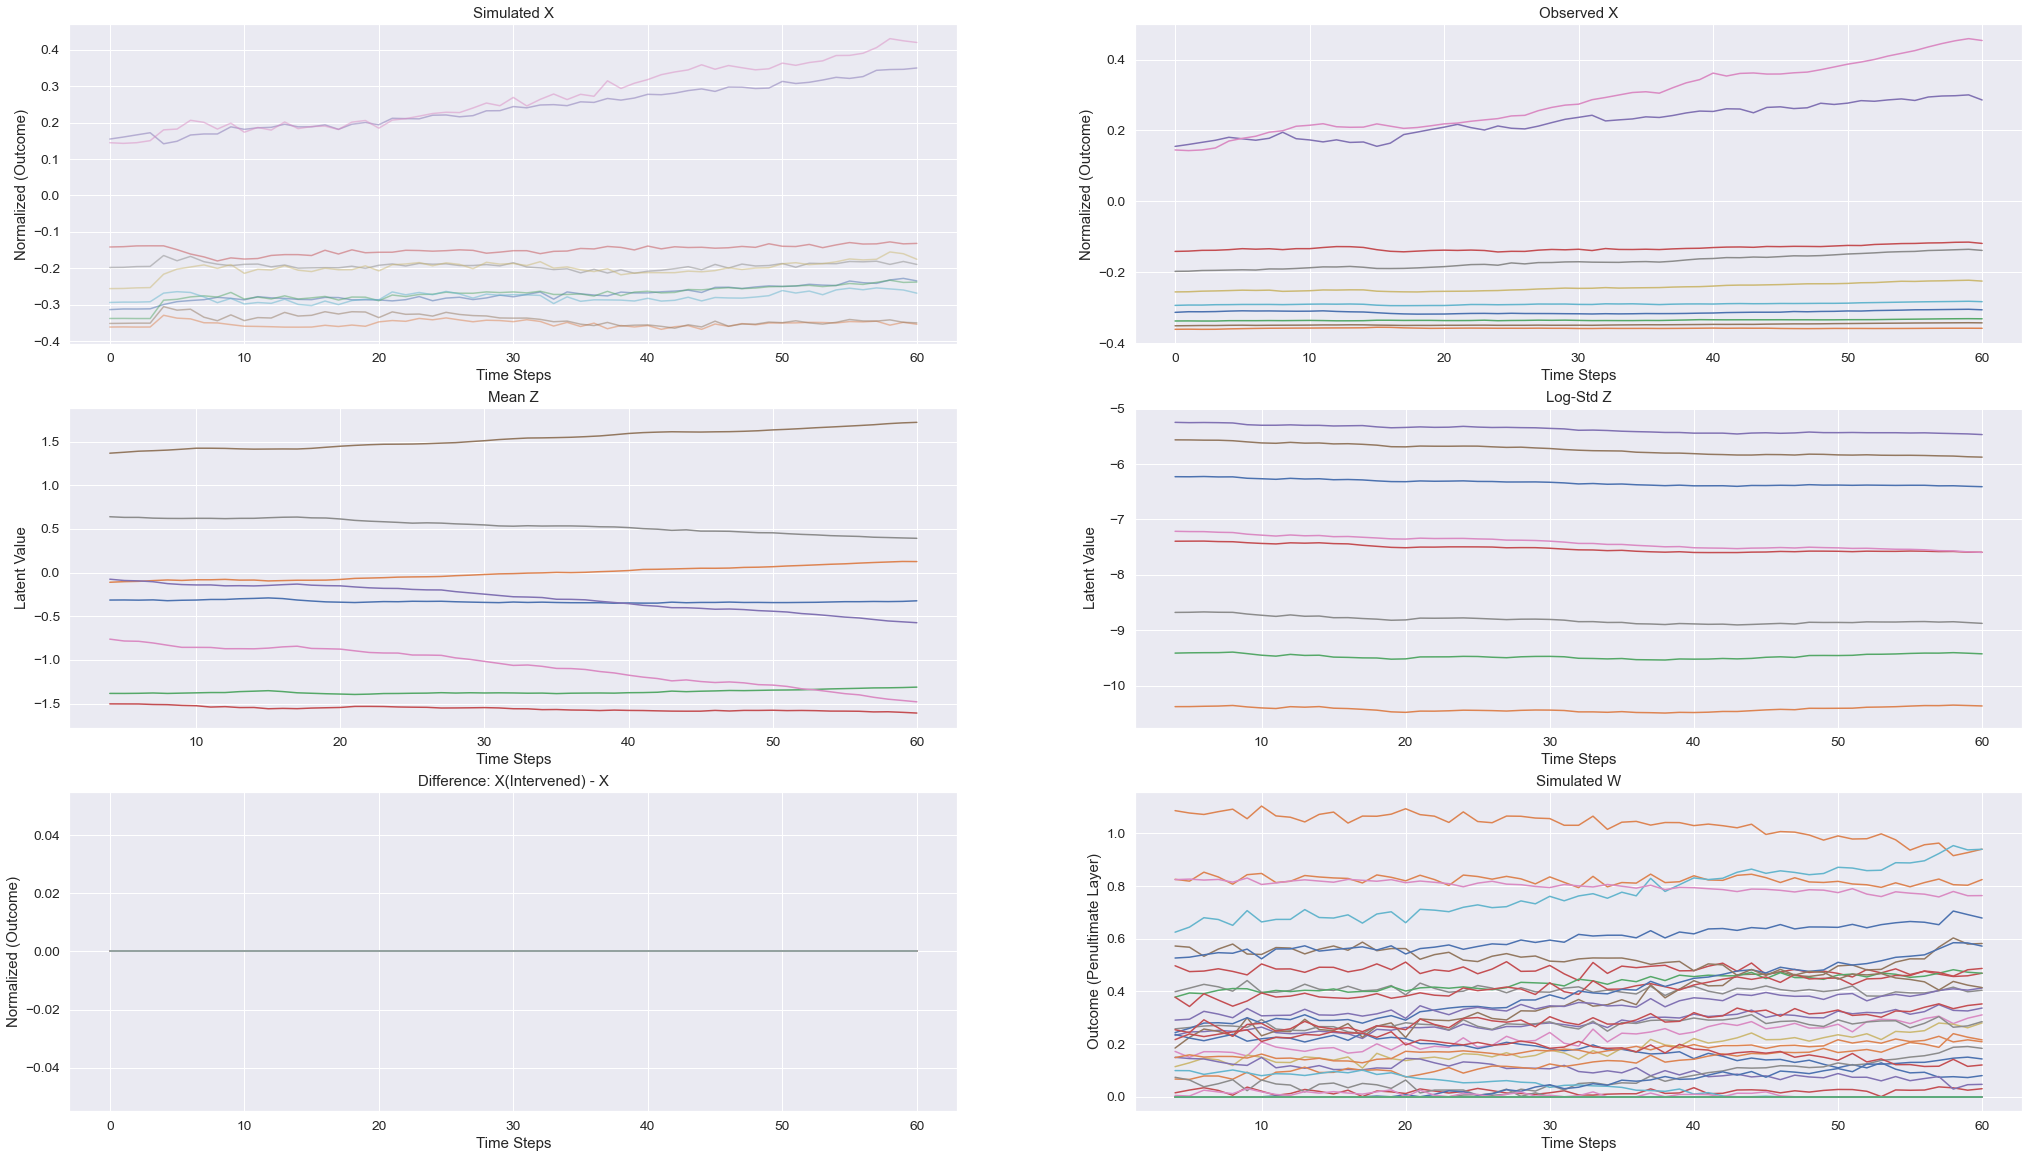

In [15]:
train_arvae.plot( data_norm[:,:1,:], vae_model) #plotting an example

### Give Input Data

In [ ]:
path_input_data = os.path.join(datapath,'input_data.csv')

input_data = pd.read_csv(path_input_data, header=0, index_col=0)
input_data = input_data.to_numpy().reshape(input_data.shape[0],1,-1)
m = np.mean(input_data)
s = np.std(input_data)
input_data = (input_data-m)/s
input_data.shape

In [ ]:
train_arvae.plot( input_data, vae_model) #plotting an example

###### Calculate Marginal Likelihood

In [ ]:
loglike = vae_model.marginal_log_likelihood(torch.tensor(input_data).float(),samples=100)

print(loglike[0])

### Intervene

**NOTE: As of 2020-09-14, there is a bug of unknown origin for the cell below when running `train_arvae.intervene_raw`. The command fails on an apparent mismatch between the size of hidden dimensions the first time that the cell is run, but succeeds if the cell is re-run. Source of bug needs to be determined and fixed.** - @kwillet

In [ ]:
T0 = 50 #setting intervention time

#define an arbitrary intervention function

def intervention_fn(V):
    A,B = V
    A[:,0] = torch.exp(A[:,0])
    A[:,1] = 1.025*A[:,1]
    A[:,2] = A[:,2] + 0.001
    B[0] = B[0] - 0.0006
    B[1] = B[1] + 0.00045
    return A,B

vae_model_intv = train_arvae.intervene_raw( target_idx = [0,1],
                               feature_idx = [0,-3,-4],
                               bias = True,
                               intervention = intervention_fn, 
                               checkpoint_path='ar_vae.ckpt', 
                               hyper_params=hyper_params, 
                               data=data_norm) #getting post-intervention model

In [ ]:
train_arvae.plot( input_data, vae_model, post_intervention_vae_model=vae_model_intv, T0=T0 ) #plotting an example

### Verify Causal Model

In [ ]:
# Replace path below with your local REMI version before running

local_remi_path = os.path.abspath("./REMI")

try:
    sys.path.append(local_remi_path)
except NameError:
    print("No local path for REMI found; package must be in Python path to run verify_causal_model().")

In [ ]:
input_data = pd.read_csv(path_input_data, header=0, index_col=0)
input_data.rename(columns={input_data.columns[0]: 'y0'},inplace=True)

TrueTE, EstTE = verify_causal_model.verify_causal_model(vae_model, 
                                    vae_model_intv, 
                                    T0, 
                                    input_data,
                                    target = list(input_data.columns[:2]), 
                                    donors = list(input_data.columns[2:]),
                                    method = 'REMI',
                                    number_samples = 1 )

In [ ]:
print(TrueTE)

In [ ]:
print(EstTE)